<a href="https://colab.research.google.com/github/romenlaw/NaiveNeuralNetwork/blob/main/tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git

In [1]:
!git config --global user.name "romenlaw"
!git config --global user.email "e"
TOKEN='github_pat_'
!git clone https://$TOKEN@github.com/romenlaw/NaiveNeuralNetwork

Cloning into 'NaiveNeuralNetwork'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 140 (delta 63), reused 40 (delta 11), pack-reused 0
Receiving objects: 100% (140/140), 221.61 KiB | 904.00 KiB/s, done.
Resolving deltas: 100% (63/63), done.


In [2]:
%cd /content/NaiveNeuralNetwork

/content/NaiveNeuralNetwork


In [3]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [186]:
!git add nnn.py visualiser.py __init__.py
!git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!git reset

Unstaged changes after reset:
M	__pycache__/nnn.cpython-310.pyc
M	nnn.py
M	visualiser.py


In [166]:
!git commit -m "add labels for better visualisation"

[main cb62e9c] add labels for better visualisation
 1 file changed, 15 insertions(+), 9 deletions(-)


In [167]:
!git push origin main

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 661 bytes | 661.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/romenlaw/NaiveNeuralNetwork
   4f972ef..cb62e9c  main -> main


# Housekeeping

In [ ]:
!pwd

/content/NaiveNeuralNetwork


In [4]:
import sys
sys.path.append('/content/NaiveNeuralNetwork')

%load_ext autoreload
%autoreload 2

In [150]:
from nnn import *
from visualiser import *


# Visualise

In [203]:
a=Scalar(2., label='a')
b=Scalar(-3, label='b')
c=Scalar(10, label='c')
e=a*b; e.label='e'
d=e+c+b; d.label='d'
f=d/e; f.label='f'
L=(-f).relu(); L.label='L'


In [204]:
L.backward()

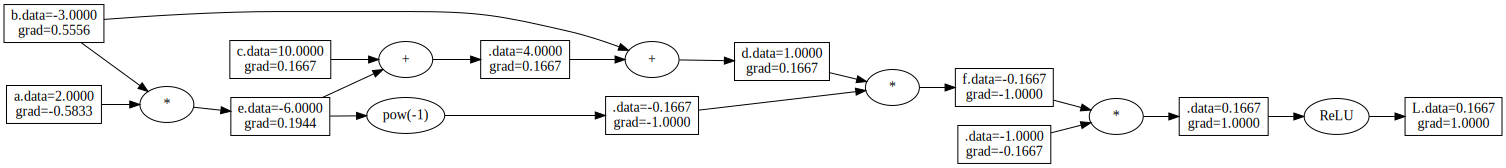

In [205]:
visualise(L)

# Gradient

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (5,3)

In [ ]:
def f(x):
  return 3*x**2 - 4 * x + 5

In [ ]:
f(2.0)

9.0

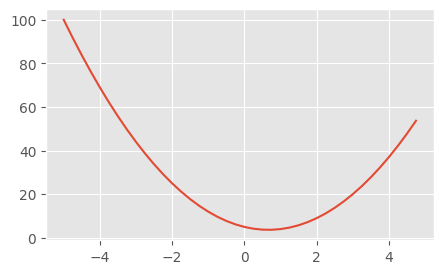

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

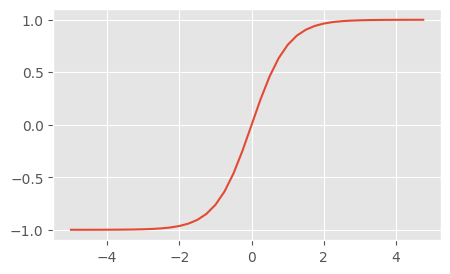

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = np.tanh(xs)
plt.plot(xs, ys)

The definition of [derivitive](https://en.wikipedia.org/wiki/Derivative) as a limit is that
$$L=\lim_{h \to 0} \dfrac{f_{(a+h)} - f_{(h)}} {h}$$

In [ ]:
h=1e-7
a=2.0
(f(a+h)-f(a))/h

8.000000288888032

Numerically check against the Scalar backward() results.

In [ ]:
def lol():
  a=Scalar(2., label='a')
  b=Scalar(-3, label='b')
  c=Scalar(10, label='c')
  e=a*b; e.label='e'
  d=e+c+b; d.label='d'
  f=d*e; f.label='f'
  L1=f.data


  h=1e-4
  a=Scalar(2., label='a')
  b=Scalar(-3, label='b')+h
  c=Scalar(10, label='c')
  e=a*b; e.label='e'
  d=e+c+b; d.label='d'
  f=d*e; f.label='f'
  L2=f.data

  print((L2-L1)/h)

lol()

-15.999400000037411


# Test with MLP

In [ ]:
import torch

In [ ]:
x1 = torch.Tensor([2.0]).double().requires_grad_(True)
x2 = torch.Tensor([0.0]).double().requires_grad_(True)
w1 = torch.Tensor([-3.0]).double().requires_grad_(True)
w2 = torch.Tensor([1.0]).double().requires_grad_(True)
b = torch.Tensor([6.8813735870195432]).double().requires_grad_(True)
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)
print(o.data.item())
o.backward()
print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [173]:
from nnn import *

In [163]:
X = [0.3, -2.7, 2.5]
mlp = MLP(3, [2,1])
mlp(X)


: -0.776812858946063

In [168]:
mlp.parameters()

[w(L0,0,I0): 0.6218497108328171,
 w(L0,0,I1): -0.7675928874569795,
 w(L0,0,I2): 0.5848459285780434,
 b(L0,0): 0.9101867316636629,
 w(L0,1,I0): -0.3019342870223416,
 w(L0,1,I1): 0.671525592553087,
 w(L0,1,I2): -0.0568843515368469,
 b(L0,1): 0.11618651112930367,
 w(L1,0,I0): -0.6727389664790564,
 w(L1,0,I1): -0.02127973399531835,
 b(L1,0): -0.3850727665928173]

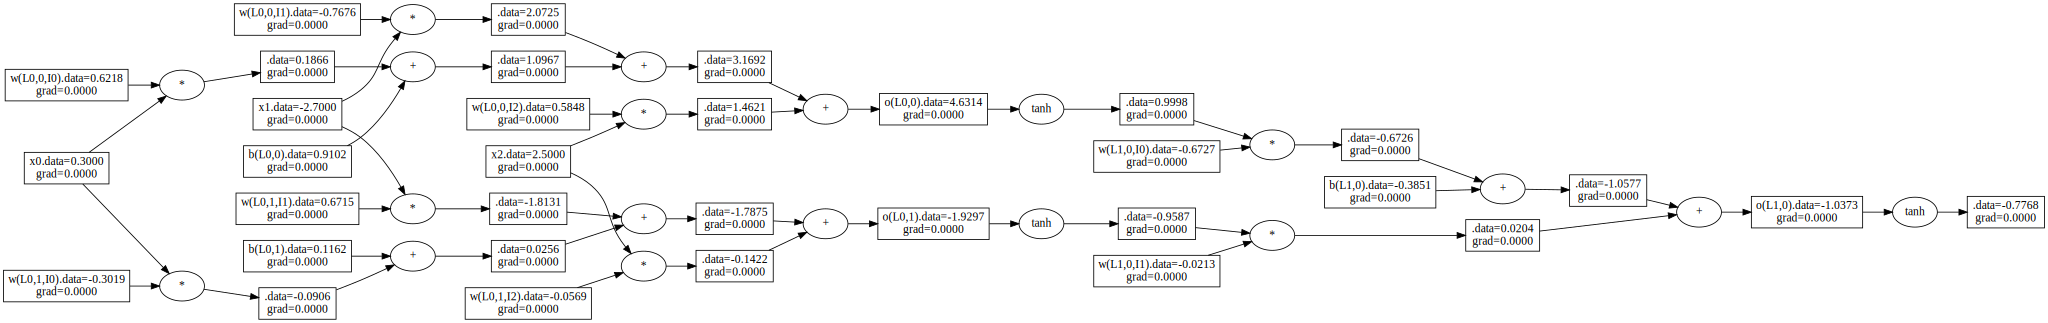

In [164]:
visualise(mlp(X))

In [174]:
batch_x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

batch_y = [1.0, -1.0, -1.0, 1.0] # ground true of y

mlp = MLP(3, [4,4,1])
y_pred = [mlp(x) for x in batch_x]
y_pred

[: -0.20606200553130635,
 : -0.4834611969894021,
 : 0.3997023515536397,
 : -0.31956039518997514]

Iterating the cells below to see the loss decrease and the y_pred get closer and closer to the ground truth batch_y.

In [181]:
loss = [(y_pred[i]-batch_y[i])**2 for i in range(len(batch_y))];
loss

[: 1.4545855611861966,
 : 0.26681233501562135,
 : 1.959166672944789,
 : 1.741239636553923]

In [182]:
loss = sum(loss); loss.label='loss'
loss

loss: 5.42180420570053

In [183]:
loss.backward()

In [119]:
for p in mlp.parameters():
  p.data += -0.05 * p.grad

In [120]:
y_pred = [mlp(x) for x in batch_x]
y_pred

[: 0.9993183512078947,
 : -0.9998999259879792,
 : -0.9999696879834216,
 : 0.9993215441029136]

In [184]:
mlp.parameters()

[w(L0,0,I0): 0.09495445896595989,
 w(L0,0,I1): 0.43823333562325373,
 w(L0,0,I2): -0.7561785654229012,
 b(L0,0): 0.6869113519169694,
 w(L0,1,I0): -0.30381101813861866,
 w(L0,1,I1): -0.3253155988794343,
 w(L0,1,I2): -0.34560157879848896,
 b(L0,1): 0.3284218939438366,
 w(L0,2,I0): -0.5469159304537219,
 w(L0,2,I1): 0.7217954979379102,
 w(L0,2,I2): -0.2935755391394457,
 b(L0,2): 0.9683169788021802,
 w(L0,3,I0): -0.5566427945778885,
 w(L0,3,I1): 0.265431713903334,
 w(L0,3,I2): 0.21007388066446264,
 b(L0,3): 0.28175537627036795,
 w(L1,0,I0): -0.2511342830991272,
 w(L1,0,I1): 0.5997808508676195,
 w(L1,0,I2): -0.512869757383289,
 w(L1,0,I3): 0.7424585108483224,
 b(L1,0): 0.6541876285780095,
 w(L1,1,I0): -0.8422706836408536,
 w(L1,1,I1): -0.5676715594276422,
 w(L1,1,I2): 0.49879349345168644,
 w(L1,1,I3): 0.8900925417774164,
 b(L1,1): 0.8755729714846421,
 w(L1,2,I0): -0.7852972559140408,
 w(L1,2,I1): -0.44856827964657886,
 w(L1,2,I2): 0.7636132638641717,
 w(L1,2,I3): -0.09867358104171298,
 b(L1,2

Interesting thing about the following graph: since tanh() is used as activation, and the y values are -1 or 1, the gradients of tanh() are all zeros.

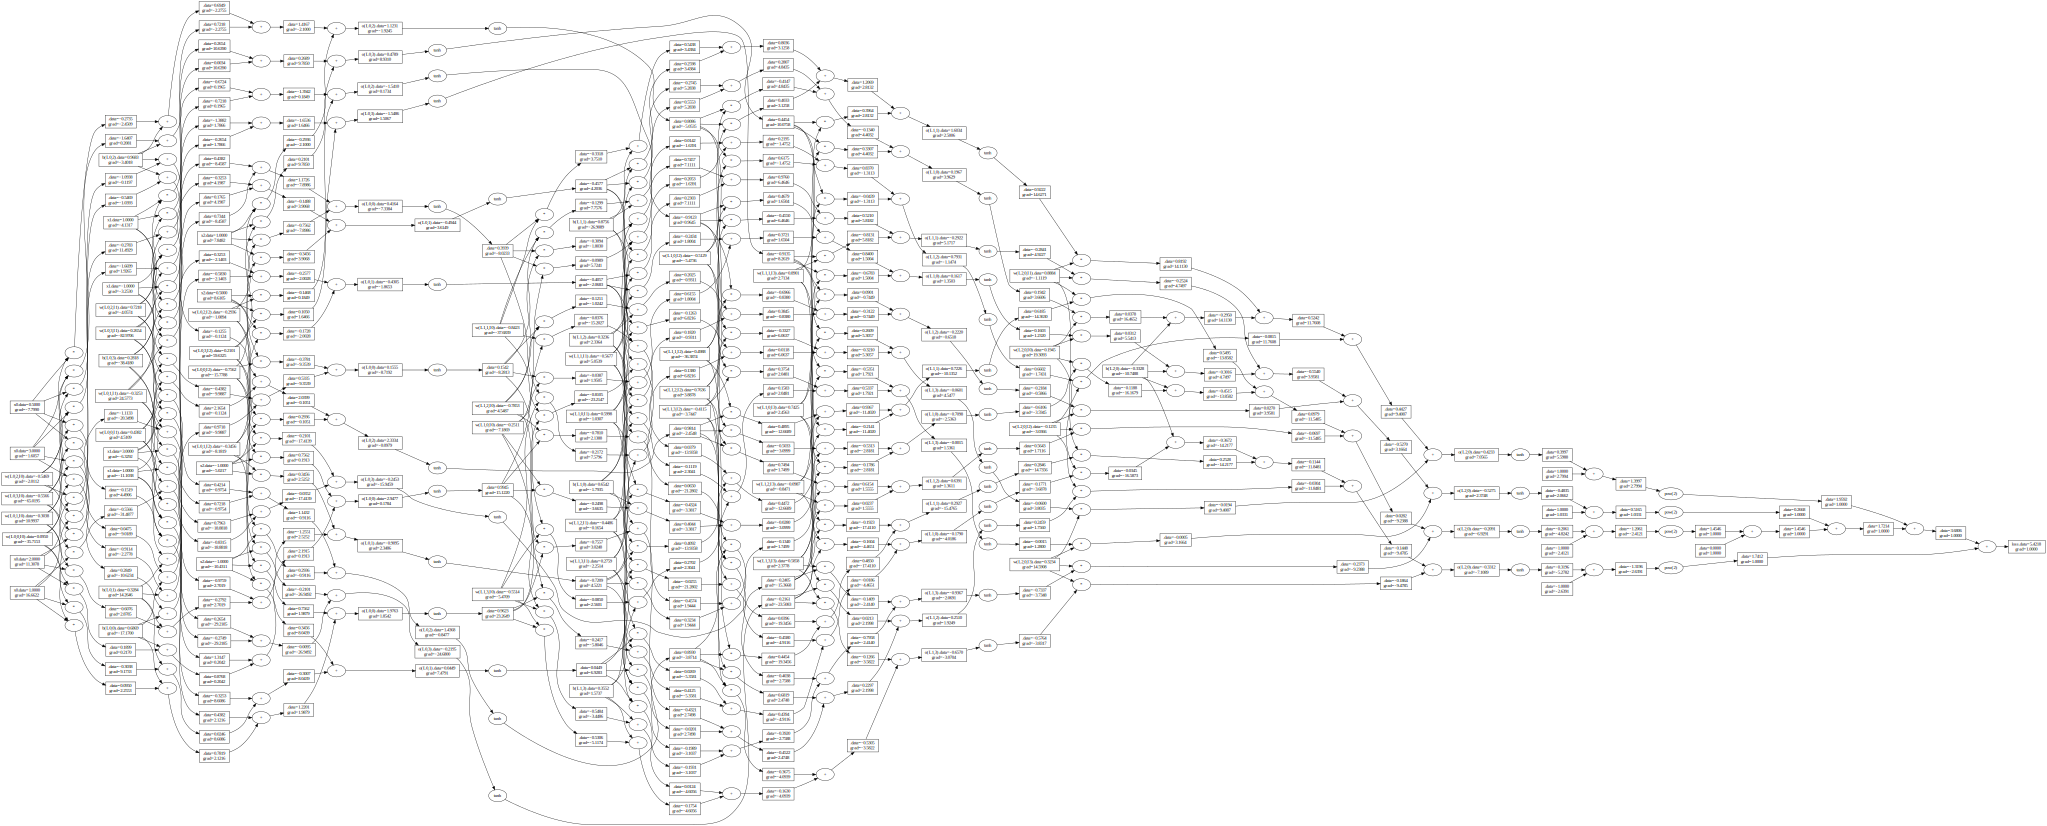

In [185]:
visualise(loss)

Putting the above together in a loop

In [190]:
batch_x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

batch_y = [1.0, -1.0, -1.0, 1.0] # ground true of y

mlp = MLP(3, [4,4,1])

In [191]:
losses=[]
for i in range(2000):
  # forward pass
  y_pred = [mlp(x) for x in batch_x]
  loss = sum([(y_pred[i]-batch_y[i])**2 for i in range(len(batch_x))])

  losses.append(loss)

  # backward pass
  for p in mlp.parameters():
    p.grad = 0.0
  loss.backward()

  # update parameters
  for p in mlp.parameters():
    p.data += -0.2 * p.grad

  if i%50 == 0:
    print(f"{i}: loss={loss.data}")

0: loss=9.142725312604053
50: loss=0.004412936531300257
100: loss=0.0024026952139632038
150: loss=0.001633484605680928
200: loss=0.001229397658581161
250: loss=0.0009812225751147515
300: loss=0.0008137467379022369
350: loss=0.0006933482224256158
400: loss=0.000602763629812873
450: loss=0.0005322287149440451
500: loss=0.0004758104582325795
550: loss=0.0004296985920845361
600: loss=0.0003913357482969519
650: loss=0.0003589425406874335
700: loss=0.0003312432255350392
750: loss=0.00030729967155253003
800: loss=0.00028640686699739706
850: loss=0.00026802492295079354
900: loss=0.0002517335315227068
950: loss=0.00023720068654983027
1000: loss=0.00022416071904224897
1050: loss=0.0002123985673955339
1100: loss=0.00020173831302669362
1150: loss=0.0001920346918167529
1200: loss=0.00018316671857689865
1250: loss=0.00017503283605322525
1300: loss=0.00016754717997906078
1350: loss=0.00016063667205852612
1400: loss=0.0001542387346743463
1450: loss=0.00014829947773986935
1500: loss=0.00014277224783970

In [192]:
y_pred

[: 0.9952473787982213,
 : -0.9934675550480536,
 : -0.9970850934478906,
 : 0.9945632768469601]

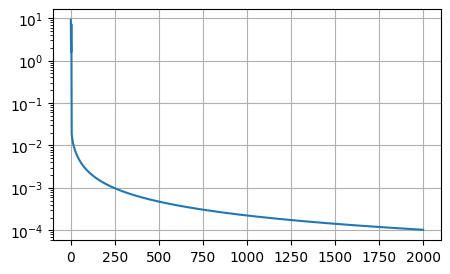

In [202]:
xs=[i for i in range(2000)]
plt.plot(xs, [l.data for l in losses])
plt.yscale('log')
#plt.xscale('log')